#Homologia 1

Librerias

In [ ]:
  # Math
import numpy as np
import math
import itertools
import sympy as sym
  # Graph
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
plt.style.use('dark_background')

Funciones necesarias para las operaciones

In [ ]:
class point:
  def __init__(self, id, coordenates):
    self.id = id
    self.coordenates = coordenates
    self.conn = []

def euclidean_distance(point_a, point_b, delta):
  distance = math.sqrt((point_a[0] - point_b[0])**2 + (point_a[1] - point_b[1])**2)
  if distance <= delta:
    return True
  return False

Datos de entrada

In [ ]:
#cloud_points = np.array([[1, 0], [0, 1], [1, 2], [3, 0], [3, 2], [4, 1]])
#"""
cloud_points = np.array([[9.75518237, 5.81497842],
       [3.45988965, 2.88846354],
       [1.30930769, 3.05334725],
       [8.23692528, 5.49768143],
       [9.47634547, 8.5349278 ],
       [8.59666776, 1.45666669],
       [6.09596423, 4.36803239],
       [6.51740602, 6.97451716],
       [2.88271691, 4.39668308],
       [6.92791098, 6.34423988],
       [1.86223387, 2.24861989],
       [5.49410032, 8.86093052],
       [2.74047984, 1.8251915 ],
       [5.47522799, 1.95373556],
       [2.65367481, 0.3778547 ],
       [1.33753431, 9.44839125],
       [8.9293468 , 1.5129663 ],
       [8.62067333, 9.65666413],
       [1.95749005, 7.07466761],
       [7.37702115, 9.79646556],
       [9.65369316, 4.42364967],
       [7.7449174 , 6.30669989],
       [2.98263896, 8.14287513],
       [8.48914703, 2.17415063],
       [5.23543337, 7.68480516],
       [2.03671421, 2.90304778],
       [5.79807424, 3.94384073],
       [2.38341777, 6.90192915],
       [8.93024434, 3.97981222],
       [0.10581909, 7.15433648]])
#"""
points = []
for i, p in enumerate(cloud_points):
  points.append(point(i, p))

Obtención de las lineas y triángulos (1-simplices y 2-simplices)

In [ ]:
def get_edges_faces(points, delta):
  edges = []
  faces = []

  for i in range(len(points)):
    p1 = points[i]
    for j in range(i+1, len(points)):
      p2 = points[j]
      # edges
      if euclidean_distance(p1.coordenates, p2.coordenates, delta):
        edges.append((len(edges), [p1, p2]))
        p1.conn.append(p2)
        p2.conn.append(p1)
      for k in range(j+1, len(points)):
        p3 = points[k]
        # faces
        if euclidean_distance(p1.coordenates, p2.coordenates, delta) and \
          euclidean_distance(p1.coordenates, p3.coordenates, delta) and \
          euclidean_distance(p3.coordenates, p2.coordenates, delta):
          faces.append((len(faces), [p1, p2, p3]))
  return edges, faces

Cálculo del número de Betty

In [ ]:
def get_betty_numbers(edges, faces, points):
  # Kernel C1 -> C0
  matriz_C1_C0 = sym.zeros(len(points), len(edges))
  for edge in edges:
    P = sym.symbols(' '.join([f'p{p.id}' for p in points]))
    matriz_C1_C0[edge[1][0].id, edge[0]] = P[edge[1][0].id]
    matriz_C1_C0[edge[1][1].id, edge[0]] = -P[edge[1][1].id]
  C1_C0 = sym.Matrix(matriz_C1_C0)
  kernel_C1_C0 = C1_C0.nullspace()
  #dim_kernel_C1_C0 = len(kernel_C1_C0)
  #print("Dimensión del Kernel C1 -> C0: ", dim_kernel_C1_C0)

  # Image/range C1 -> C0
  image_C1_C0 = C1_C0.columnspace()
  #dim_image_C1_C0 = len(image_C1_C0)
  #print("Dimensión de la Imagen C1 -> C0: ", dim_image_C1_C0)

  # Kernel C2 -> C1
  matriz_C2_C1 = sym.zeros(len(edges), len(faces))
  for face in faces:
    E = sym.symbols(' '.join([f'e{e[0]}' for e in edges]))
    points_edge_face = list(list(cycle) for cycle in itertools.combinations([p for p in face[1]], 2))
    edges_face = [e for e in edges if e[1] in points_edge_face]
    matriz_C2_C1[edges_face[0][0], face[0]] = E[edges_face[0][0]]
    matriz_C2_C1[edges_face[1][0], face[0]] = -E[edges_face[1][0]]
    matriz_C2_C1[edges_face[2][0], face[0]] = E[edges_face[2][0]]
  C2_C1 = sym.Matrix(matriz_C2_C1)
  #kernel_C2_C1 = C2_C1.nullspace()
  #dim_kernel_C2_C1 = len(kernel_C2_C1)
  #print("Dimensión del Kernel C2 -> C1: ", dim_kernel_C2_C1)

  # Image/range C2 -> C1
  image_C2_C1 = C2_C1.columnspace()
  #dim_image_C2_C1 = len(image_C2_C1)
  #print("Dimensión de la Imagen C2 -> C1: ", dim_image_C2_C1)

  # Dimensiones homologias
  dim_H0 = len(points) - len(image_C1_C0)
  #print("H0, número de componentes conexas: ", dim_H0)
  dim_H1 = len(kernel_C1_C0) - len(image_C2_C1)
  #print("H1, número de huecos: ", dim_H1)
  return dim_H0, dim_H1

Grafica de complejo de Rips para los niveles 0, 1, 2

In [ ]:
def create_graph(ax, title, x, y, cloud_points, edges, faces):
  ax[x, y].set_title(title, fontsize = 10)
  # Graph points, nivel 0
  ax[x, y].scatter(cloud_points[:,0], cloud_points[:,1], color= "white", marker= "o", zorder=3)
  # Graph edges, nivel 1
  for edge in edges:
    punto_a = edge[1][0]
    punto_b = edge[1][1]
    ax[x, y].plot([punto_a.coordenates[0], punto_b.coordenates[0]], [punto_a.coordenates[1], punto_b.coordenates[1]], color='purple', zorder=2)
  # Graph faces, nivel 2
  for face in faces:
    ax[x, y].fill([f.coordenates[0] for f in face[1]], [f.coordenates[1] for f in face[1]], alpha=0.2, zorder=1)

Evolución de la homología 1

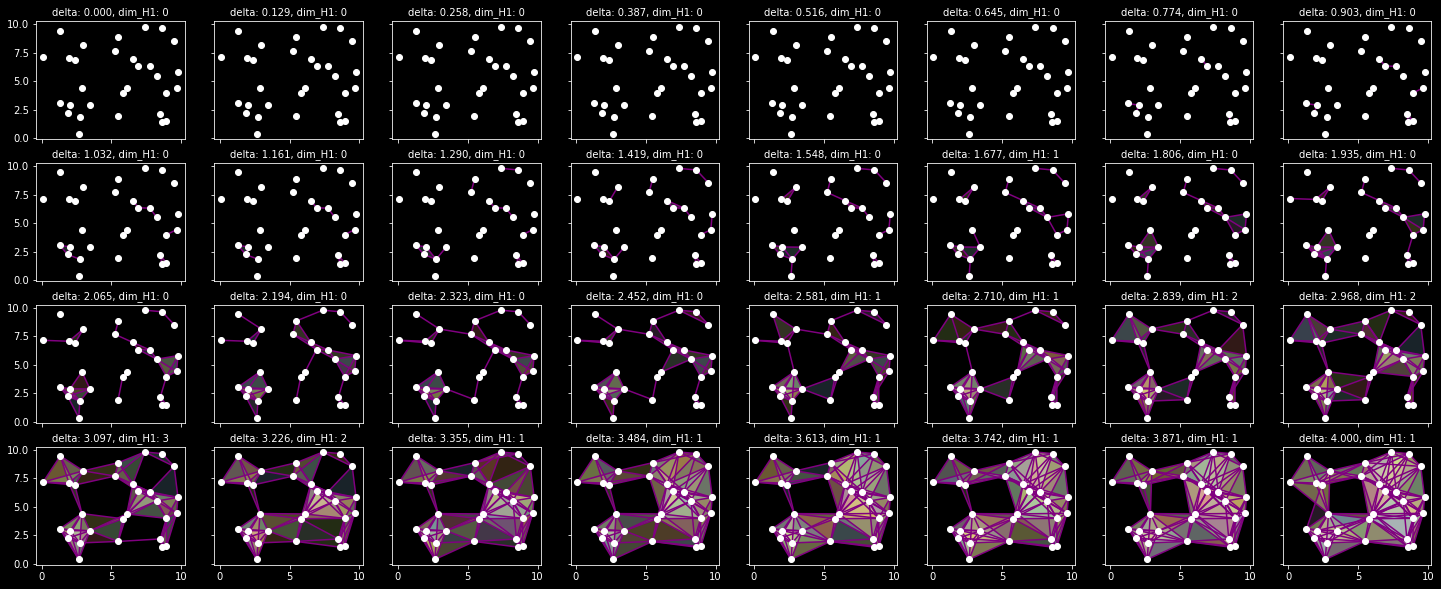

In [ ]:
fig, ax = plt.subplots(4, 8, figsize=(25, 10), sharex=True, sharey=True)

dims_H0, dims_H1 = [], []
count_graphs = 0
for delta in np.linspace(0, 4, 32):
  edges, faces = get_edges_faces(points, delta)
  dim_H0, dim_H1 = get_betty_numbers(edges, faces, points)
  create_graph(ax, f'delta: {delta:,.3f}, dim_H1: {dim_H1}', count_graphs//8, count_graphs%8, cloud_points, edges, faces)
  dims_H0.append(dim_H0)
  dims_H1.append(dim_H1)
  count_graphs += 1

Homología 1 vs delta

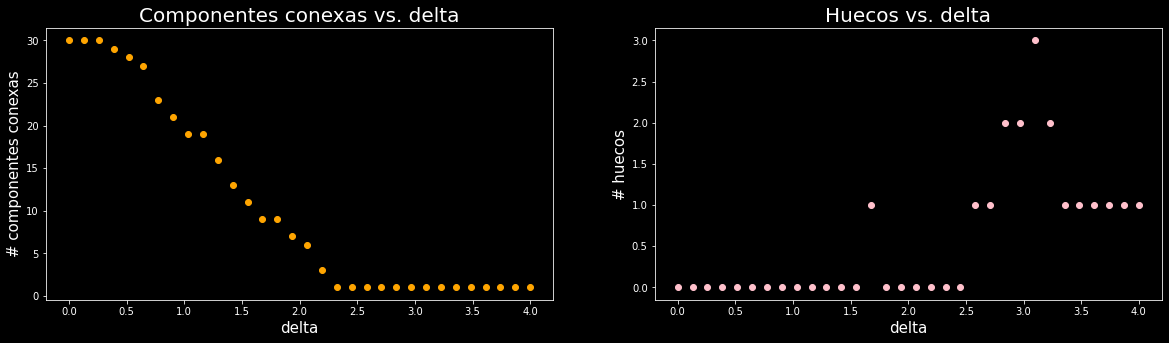

In [ ]:
fig2, ax2 = plt.subplots(1, 2, figsize=(20,5))
ax2[0].set_xlabel('delta', fontsize = 15)
ax2[0].set_ylabel('# componentes conexas', fontsize = 15)
ax2[0].set_title('Componentes conexas vs. delta', fontsize = 20)

ax2[1].set_xlabel('delta', fontsize = 15)
ax2[1].set_ylabel('# huecos', fontsize = 15)
ax2[1].set_title('Huecos vs. delta', fontsize = 20)

ax2[0].scatter(np.linspace(0, 4, 32), dims_H0, color='orange')
ax2[1].scatter(np.linspace(0, 4, 32), dims_H1, color='pink')